In [ ]:
!pip list

In [7]:
import tensorflow as tf
import os as os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [1]:
import cv2
import imghdr

In [15]:
data_dir = 'data'

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [191]:
os.listdir(os.path.join(data_dir, "sad people"))

['OIP (1).jpg',
 'OIP (10).jpg',
 'OIP (11).jpg',
 'OIP (12).jpg',
 'OIP (13).jpg',
 'OIP (14).jpg',
 'OIP (15).jpg',
 'OIP (16).jpg',
 'OIP (17).jpg',
 'OIP (18).jpg',
 'OIP (19).jpg',
 'OIP (2).jpg',
 'OIP (20).jpg',
 'OIP (21).jpg',
 'OIP (22).jpg',
 'OIP (23).jpg',
 'OIP (24).jpg',
 'OIP (25).jpg',
 'OIP (26).jpg',
 'OIP (27).jpg',
 'OIP (28).jpg',
 'OIP (29).jpg',
 'OIP (3).jpg',
 'OIP (30).jpg',
 'OIP (31).jpg',
 'OIP (32).jpg',
 'OIP (33).jpg',
 'OIP (34).jpg',
 'OIP (35).jpg',
 'OIP (36).jpg',
 'OIP (37).jpg',
 'OIP (38).jpg',
 'OIP (39).jpg',
 'OIP (4).jpg',
 'OIP (40).jpg',
 'OIP (41).jpg',
 'OIP (42).jpg',
 'OIP (43).jpg',
 'OIP (44).jpg',
 'OIP (45).jpg',
 'OIP (46).jpg',
 'OIP (47).jpg',
 'OIP (48).jpg',
 'OIP (49).jpg',
 'OIP (5).jpg',
 'OIP (50).jpg',
 'OIP (51).jpg',
 'OIP (52).jpg',
 'OIP (53).jpg',
 'OIP (54).jpg',
 'OIP (55).jpg',
 'OIP (56).jpg',
 'OIP (57).jpg',
 'OIP (58).jpg',
 'OIP (59).jpg',
 'OIP (6).jpg',
 'OIP (61).jpg',
 'OIP (62).jpg',
 'OIP (7).jpg',
 'OI

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}', format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print('Issue with image {}'.format(image_path))
#             os.remove(image_path)

In [32]:
dogs = cv2.imread(os.path.join("data", "happy people", "kisama.jpg"))

In [37]:
import matplotlib.pyplot as plt
import numpy as np 

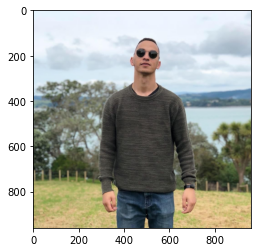

In [36]:
plt.imshow(cv2.cvtColor(dogs, cv2.COLOR_BGR2RGB))
plt.show()

### Load Dataset

In [39]:
# tf.data.Dataset??

In [182]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 136 files belonging to 3 classes.


In [183]:
data_iterator = data.as_numpy_iterator()

In [184]:
batch = data_iterator.next()

In [185]:
len(batch)

2

In [93]:
batch = data_iterator.next()

In [94]:
# images represented as numpy arrays

batch[0].shape

(32, 256, 256, 3)

In [95]:
# CLASS 1 = SAD PEOPLE
# CLASS 0 = HAPPY HEOPLE

batch[1]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

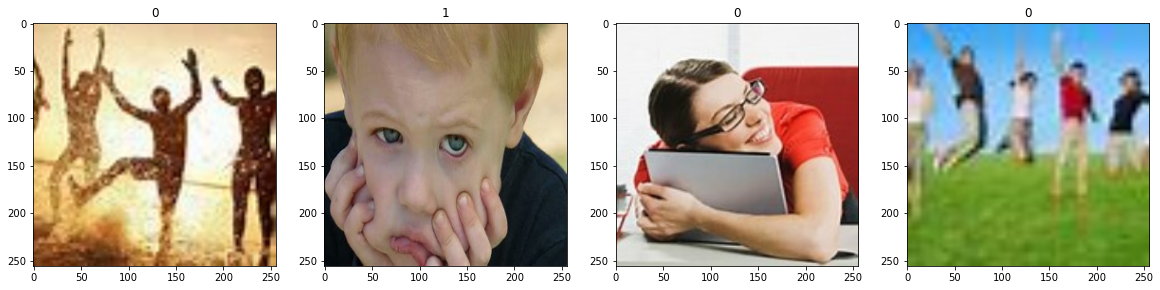

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

looking at the pictures above you can see that the value 0 flag is assigned to happy images and the 1 flag is assigned to sad images

In [97]:
scaled = batch[0] / 255

In [98]:
scaled.max()

1.0

### Preprocess Data
 - scaled data

In [107]:
data = data.map(lambda x,y: (x/255, y))

In [108]:
scaled_iterator = data.as_numpy_iterator()

In [109]:
batch = scaled_iterator.next()

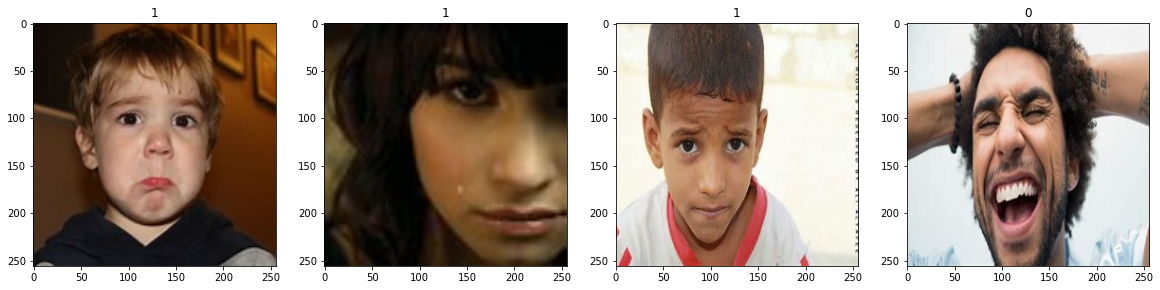

In [110]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [112]:
batch[0].min()

0.0

### Split Data

In [118]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [119]:
len(data)

5

In [120]:
train_size

3

In [121]:
val_size

1

In [122]:
test_size

1

In [123]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [124]:
len(test)

1

### Deep Model

In [127]:
# build deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [135]:
model = Sequential()

In [136]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [137]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

### Train

In [139]:
logdir = 'logs'

In [140]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
hist = model.fit(train, epochs = 20, validation_data = val,  callbacks = [tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 0.7663 - accuracy: 0.5417 - val_loss: 0.6876 - val_accuracy: 0.6250
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.6710 - accuracy: 0.7083 - val_loss: 0.6776 - val_accuracy: 0.5625
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6627 - accuracy: 0.6562 - val_loss: 0.5852 - val_accuracy: 0.7188
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.5861 - accuracy: 0.7188 - val_loss: 0.5533 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 3s 877ms/step - loss: 0.5471 - accuracy: 0.6562 - val_loss: 0.4971 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 2s 802ms/step - loss: 0.4696 - accuracy: 0.7812 - val_loss: 0.4002 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 2s 771ms/step - loss: 0.3689 - accuracy: 0.8750 - val_loss: 0.3322 - val_accuracy: 0.8750
Epoch 8/20
3/3 [================

### Plot Performamce

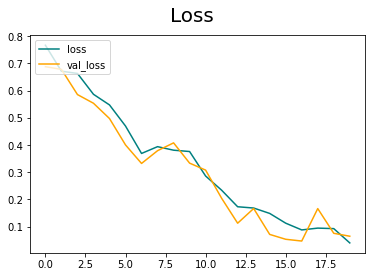

In [149]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

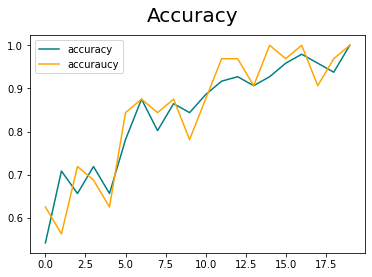

In [150]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='accuraucy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate Performance

In [151]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [153]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [154]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 184ms/step


In [192]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8333333134651184, Recall:1.0, Accuracy:0.8571428656578064


### Test

In [170]:
import cv2

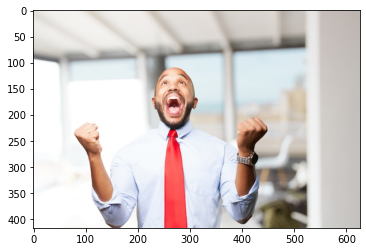

In [223]:
img = cv2.imread("happytest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

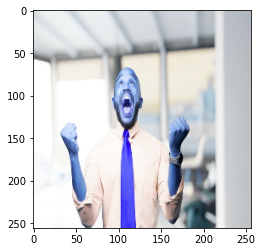

In [238]:
# resizing the image

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [225]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [226]:
resize.shape

TensorShape([256, 256, 3])

In [227]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [228]:
yhat

array([[0.12834817]], dtype=float32)

In [229]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


### Save the Model

In [230]:
from tensorflow.keras.models import load_model

In [231]:
model.save(os.path.join('models', 'CNNImageModel.h5'))

In [232]:
new_model = load_model(os.path.join('models', 'CNNImageModel.h5'))

In [233]:
new_model

In [235]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [236]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
